**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install skimpy
import skimpy as sk
import scipy.stats as stats
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import scale

**Reading Data and Exploratory Data Analysis**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mrc03/IBM-HR-Analytics-Employee-Attrition-Performance/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
print (df.shape)
df.head(5)

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
df.value_counts('Attrition')

,count
Attrition,
No,1233
Yes,237


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df_categorical = df[categorical_cols]
df_categorical.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

**Establishing if there is a relationship between categorical variable**

In [ ]:
from scipy.stats import chi2_contingency

# List of categorical variables to compare against 'Attrition'
variables = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for var in variables:
    contingency_table = pd.crosstab(df['Attrition'], df[var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for Attrition vs {var}:")
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print("-" * 30)

Chi-Square Test for Attrition vs Attrition:
Chi-Square Statistic: 1462.6145539474094
P-value: 0.0
------------------------------
Chi-Square Test for Attrition vs BusinessTravel:
Chi-Square Statistic: 24.182413685655174
P-value: 5.608614476449931e-06
------------------------------
Chi-Square Test for Attrition vs Department:
Chi-Square Statistic: 10.79600732241067
P-value: 0.004525606574479633
------------------------------
Chi-Square Test for Attrition vs EducationField:
Chi-Square Statistic: 16.024674119585423
P-value: 0.006773980139025222
------------------------------
Chi-Square Test for Attrition vs Gender:
Chi-Square Statistic: 1.1169671241970975
P-value: 0.29057244902890855
------------------------------
Chi-Square Test for Attrition vs JobRole:
Chi-Square Statistic: 86.19025367670434
P-value: 2.752481638050657e-15
------------------------------
Chi-Square Test for Attrition vs MaritalStatus:
Chi-Square Statistic: 46.163676540848705
P-value: 9.45551106034083e-11
-----------------

The above shows that there is a significant association between **attrition and Overtime,MaritalStatus,JobRole,EducationalField, Department and Business travel**

To explore the relationship between **attrition and Job Roles**, we examined a contingency table that compared raw counts and attrition rates across different departments. The analysis revealed a higher incidence of attrition among employees in Human Resources, Laboratory Technicians, and, most notably, the Sales Representative department. This indicates that these roles are experiencing the highest turnover rates. Consequently, retention strategies should be primarily focused on these areas to address the underlying issues and improve employee retention effectively.

In [ ]:
# Create the crosstab
crosstab_result = pd.crosstab(df['JobRole'], df['Attrition'])

# Calculate attrition rates for each job role
attrition_rates = crosstab_result['Yes'] / (crosstab_result['Yes'] + crosstab_result['No'])

# Print the attrition rates
print(attrition_rates)

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64


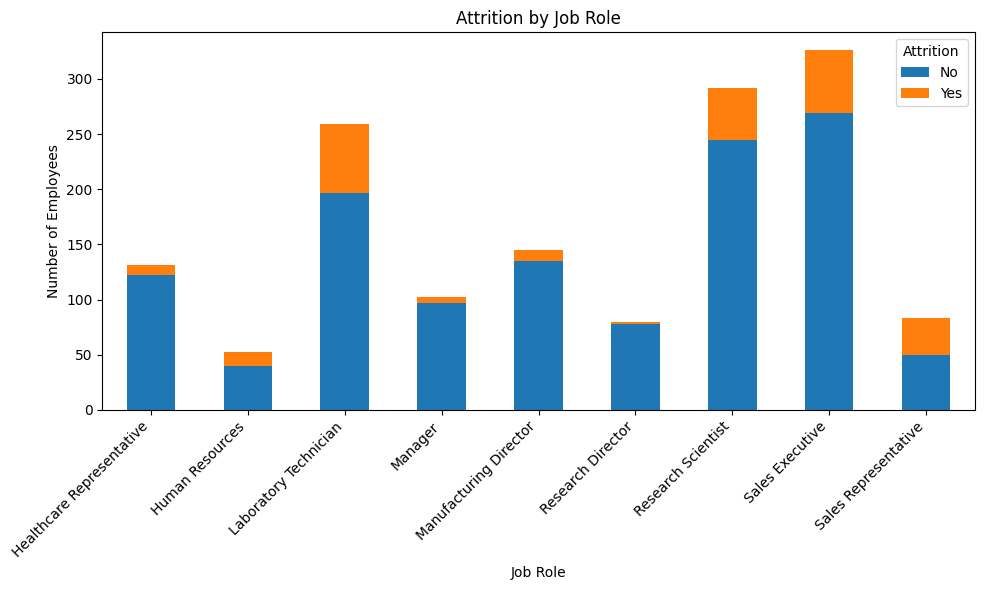

In [ ]:
import matplotlib.pyplot as plt

# Create the crosstab
crosstab_result = pd.crosstab(df['JobRole'], df['Attrition'])

# Plot the stacked bar chart
crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

The is strong relationhip blw attrition gender,jobrole, Maritalstatus,over10 and Overtime

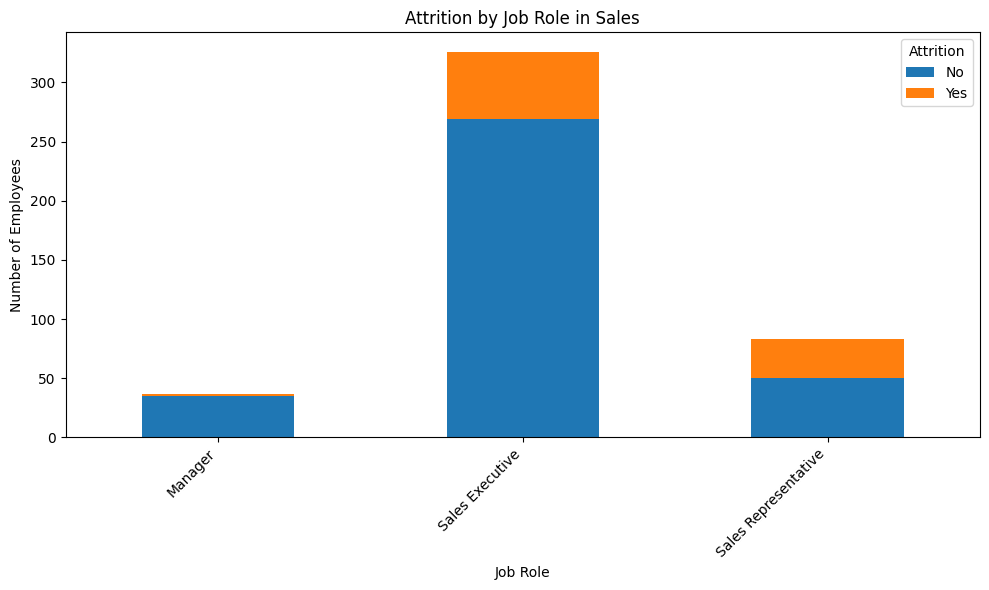

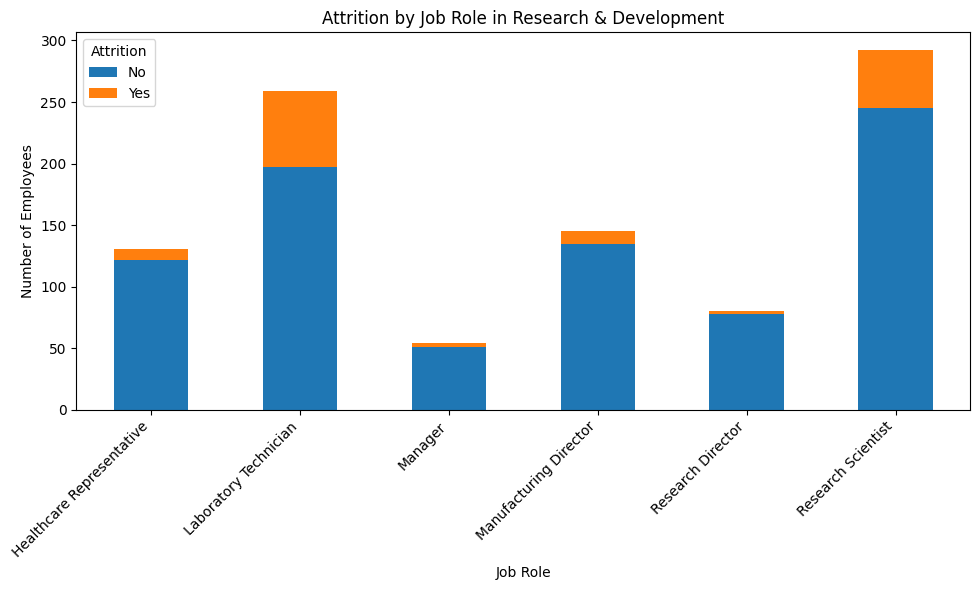

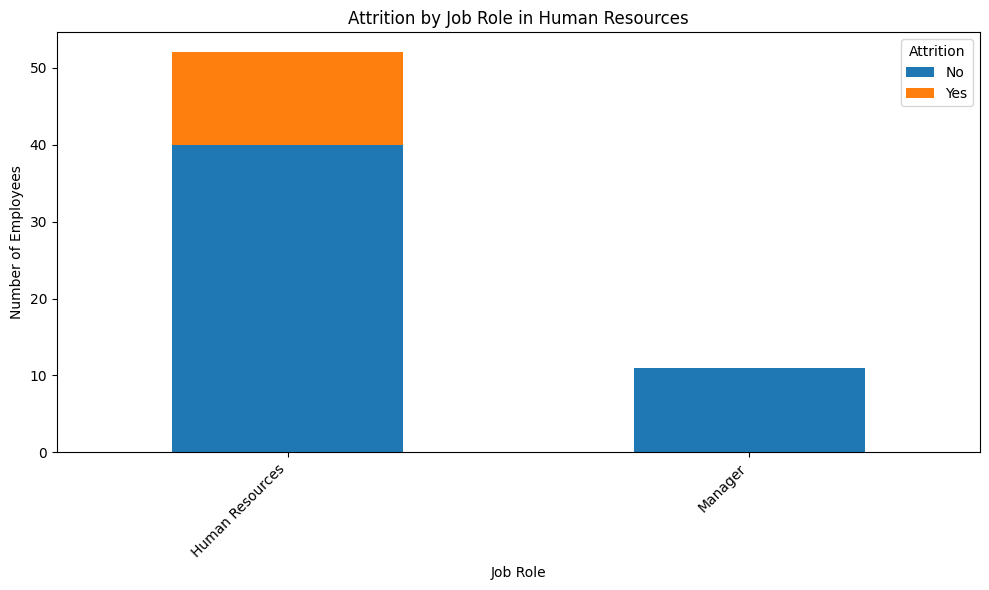

In [ ]:
import matplotlib.pyplot as plt

for department in df['Department'].unique():
    # Filter the DataFrame for the current department
    df_dept = df[df['Department'] == department]

    # Create the crosstab for the department
    crosstab_result = pd.crosstab(df_dept['JobRole'], df_dept['Attrition'])

    # Plot the stacked bar chart for the department
    crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Attrition by Job Role in {department}')
    plt.xlabel('Job Role')
    plt.ylabel('Number of Employees')
    plt.legend(title='Attrition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours','Over18'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
df['BusinessTravel'] = df['BusinessTravel'].astype('category')
df['Department'] = df['Department'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['OverTime'] = df['OverTime'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

In [ ]:
# Assuming 'df' is your DataFrame with categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [ ]:
correlation_matrix = df_encoded.corr()

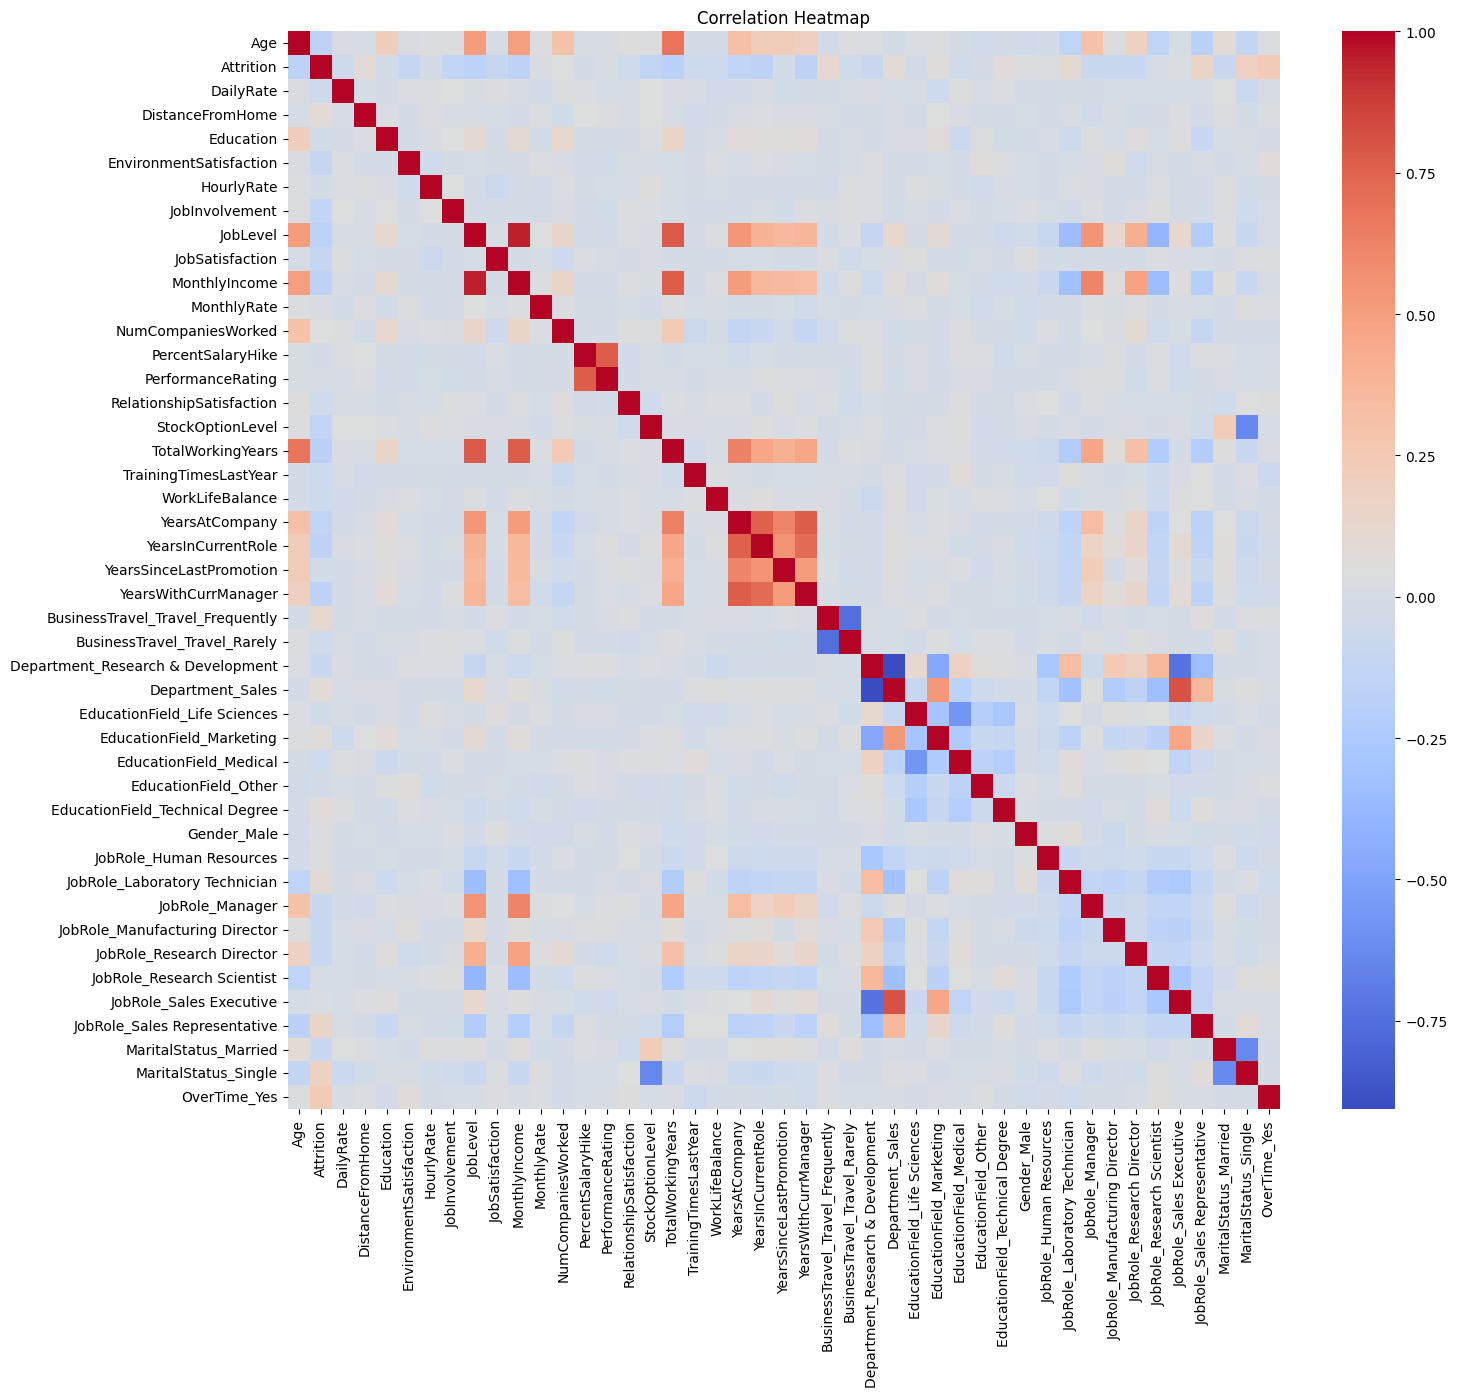

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,14))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
class_distribution = df['Attrition'].value_counts()
print(class_distribution)

Attrition
0    1233
1     237
Name: count, dtype: int64


In [ ]:
Predictor = df_encoded.drop('Attrition', axis=1)
Target = df_encoded['Attrition']

balancing the data set to avoid the model beng biased

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' contains your features and 'y' is the target variable
smote = SMOTE(random_state=42)  # Set random state for reproducibility
X_resampled, y_resampled = smote.fit_resample(Predictor, Target)

In [ ]:
new_class_distribution = pd.Series(y_resampled).value_counts()
print(new_class_distribution)

Attrition
1    1233
0    1233
Name: count, dtype: int64


Training the balanced dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

**Logistic regression model**

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       250
           1       0.67      0.68      0.67       244

    accuracy                           0.68       494
   macro avg       0.68      0.68      0.68       494
weighted avg       0.68      0.68      0.68       494

AUC-ROC Score: 0.7213114754098362


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model accuracy is 68%**. The model correctly predicted the outcome for 68% of the employees in the test dataset.

**AUC_ROC score of 72%** the model has some discriminatory power, but it's not excellent. It has a decent ability to rank employees in terms of their likelihood of leaving, but there's still a considerable overlap between the two classes in its predictions

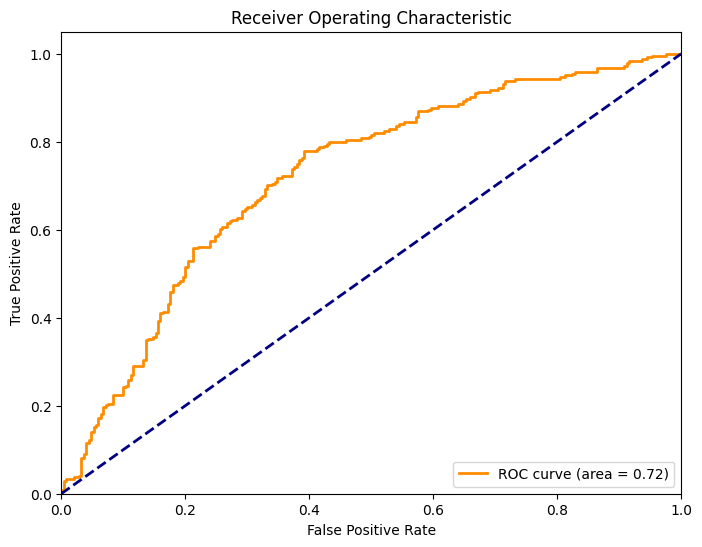

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' is your trained logistic regression model and 'X_test', 'y_test' are your test data
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains true labels and 'y_pred' contains predicted labels
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6761133603238867


In [ ]:
print(Predictor.dtypes)

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
BusinessTra

In [ ]:
Predictor

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,True,False,False,False,False,False,False,True,False,False
1466,39,613,6,1,4,42,2,3,1,9991,...,False,False,False,False,False,False,False,True,False,False
1467,27,155,4,3,2,87,4,2,2,6142,...,False,False,True,False,False,False,False,True,False,True
1468,49,1023,2,3,4,63,2,2,2,5390,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
bool_cols = Predictor.select_dtypes(include='bool').columns
print(bool_cols)

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')


In [ ]:
Predictor[bool_cols] = Predictor[bool_cols].astype(int)

In [ ]:
Predictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Assuming 'Predictor' contains your features and 'Target' is the target variable
X = Predictor
y = Target
model = sm.Logit(y, X).fit()

# Calculate odds ratios and create a DataFrame
odds_ratios = np.exp(model.params)
odds_ratios_df = pd.DataFrame({
    'Variable': odds_ratios.index,
    'Odds Ratio': odds_ratios.values
})

print(odds_ratios_df)

Optimization terminated successfully.
         Current function value: 0.292242
         Iterations 8
                             Variable  Odds Ratio
0                                 Age    0.969312
1                           DailyRate    0.999717
2                    DistanceFromHome    1.046282
3                           Education    1.002364
4             EnvironmentSatisfaction    0.646275
5                          HourlyRate    1.000950
6                      JobInvolvement    0.589742
7                            JobLevel    0.912466
8                     JobSatisfaction    0.661477
9                       MonthlyIncome    1.000010
10                        MonthlyRate    1.000005
11                 NumCompaniesWorked    1.215646
12                  PercentSalaryHike    0.979500
13                  PerformanceRating    1.105085
14           RelationshipSatisfaction    0.772643
15                   StockOptionLevel    0.810576
16                  TotalWorkingYears    0.94180

**Hyperparameter Turning for Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']  # Choose solvers that support both L1 and L2
}

# Initialize the logistic regression model
model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model_Lgr = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model_Lgr.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       250
           1       0.92      0.87      0.89       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



The model has an accuracy of 0.90, **which means it predicted the correct class for 90% of the samples** in the test set.
Looking at the
**precision and recall**, both classes (0 and 1) have similar scores, indicating a balanced performance.

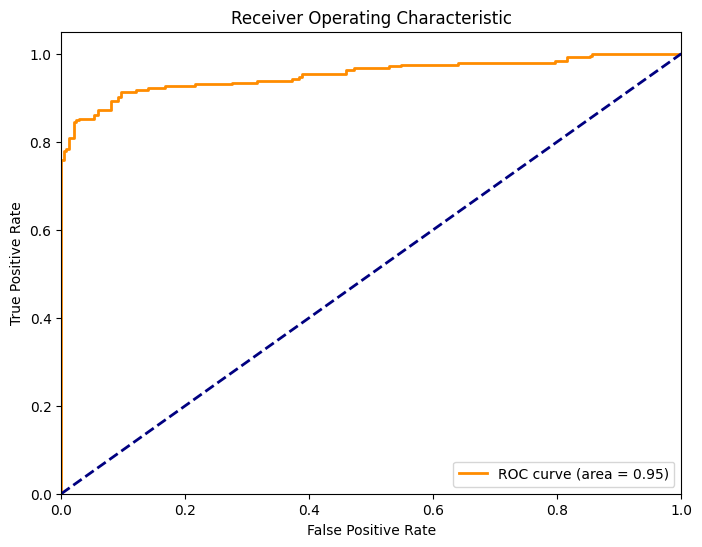

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' is your trained logistic regression model and 'X_test', 'y_test' are your test data
y_probs = best_model_Lgr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Model accuracy is 90%**. The model correctly predicted the outcome for 90% of the employees in the test dataset.

**AUC_ROC score of 95%** the model has a good discriminatory power. It has a good ability to rank employees in terms of their likelihood of leaving.

**TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model (example using classification report)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       250
           1       0.83      0.86      0.84       244

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model  <---- This line was missing
tree_model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = tree_model.feature_importances_

# Get feature names (assuming X_train is a pandas DataFrame)
feature_names = X_train.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Optionally, sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df.head(10))

                     Feature  Importance
15          StockOptionLevel    0.159827
8            JobSatisfaction    0.086103
29    EducationField_Medical    0.072208
9              MonthlyIncome    0.062817
10               MonthlyRate    0.046597
6             JobInvolvement    0.045171
14  RelationshipSatisfaction    0.044702
2           DistanceFromHome    0.038176
1                  DailyRate    0.029830
3                  Education    0.025860


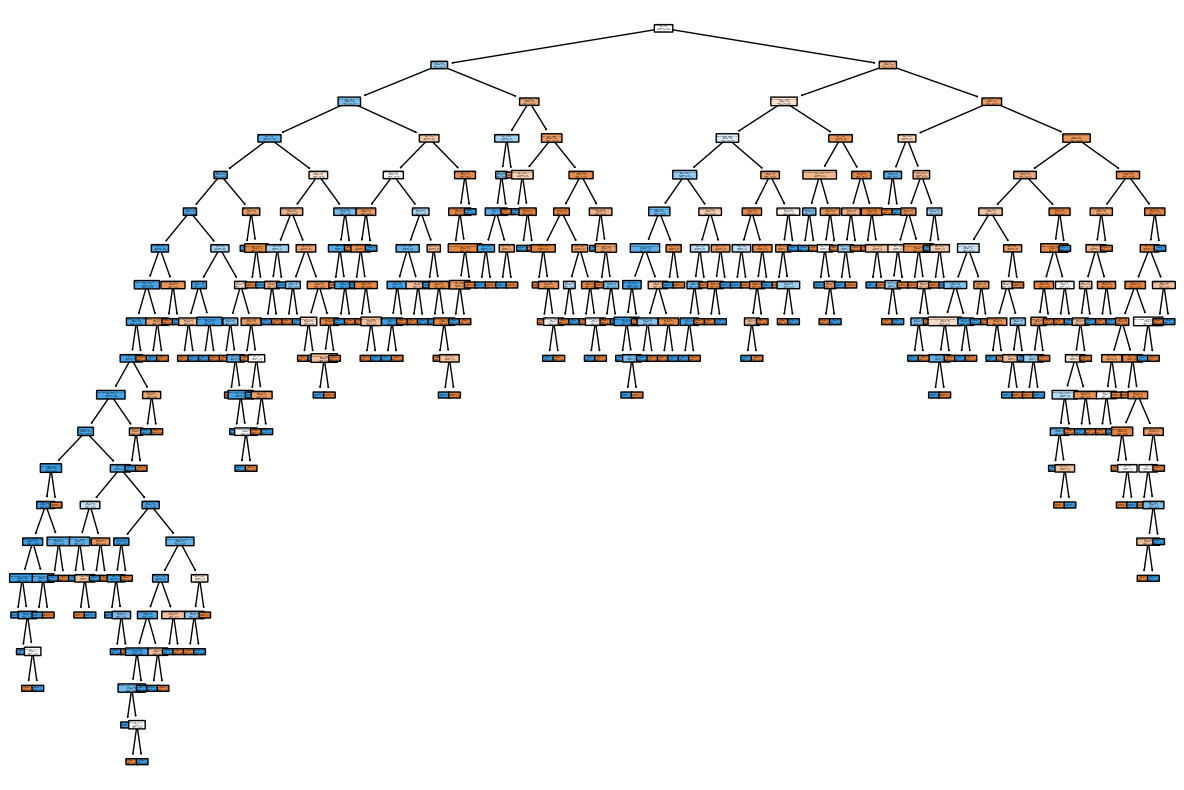

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'tree_model' is your trained DecisionTreeClassifier
plt.figure(figsize=(15, 10))
plot_tree(tree_model,
          filled=True,
          rounded=True,
          class_names=['Class 0', 'Class 1'], # Replace with your actual class names
          feature_names=X_train.columns) # Assuming X_train is a pandas DataFrame
plt.show()

**Hyperparameter optimization/Turning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [5],
    'min_samples_leaf': [2] }

#Initialize the Decision Tree Classifier and GridSearchCV

tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

#Fit the grid search to the training data:
grid_search.fit(X_train, y_train)


#Get the best hyperparameters and best model:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model_Tr = grid_search.best_estimator_


#Evaluate the best model on the test set:
y_pred = best_model_Tr.predict(X_test)
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       250
           1       0.84      0.84      0.84       244

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



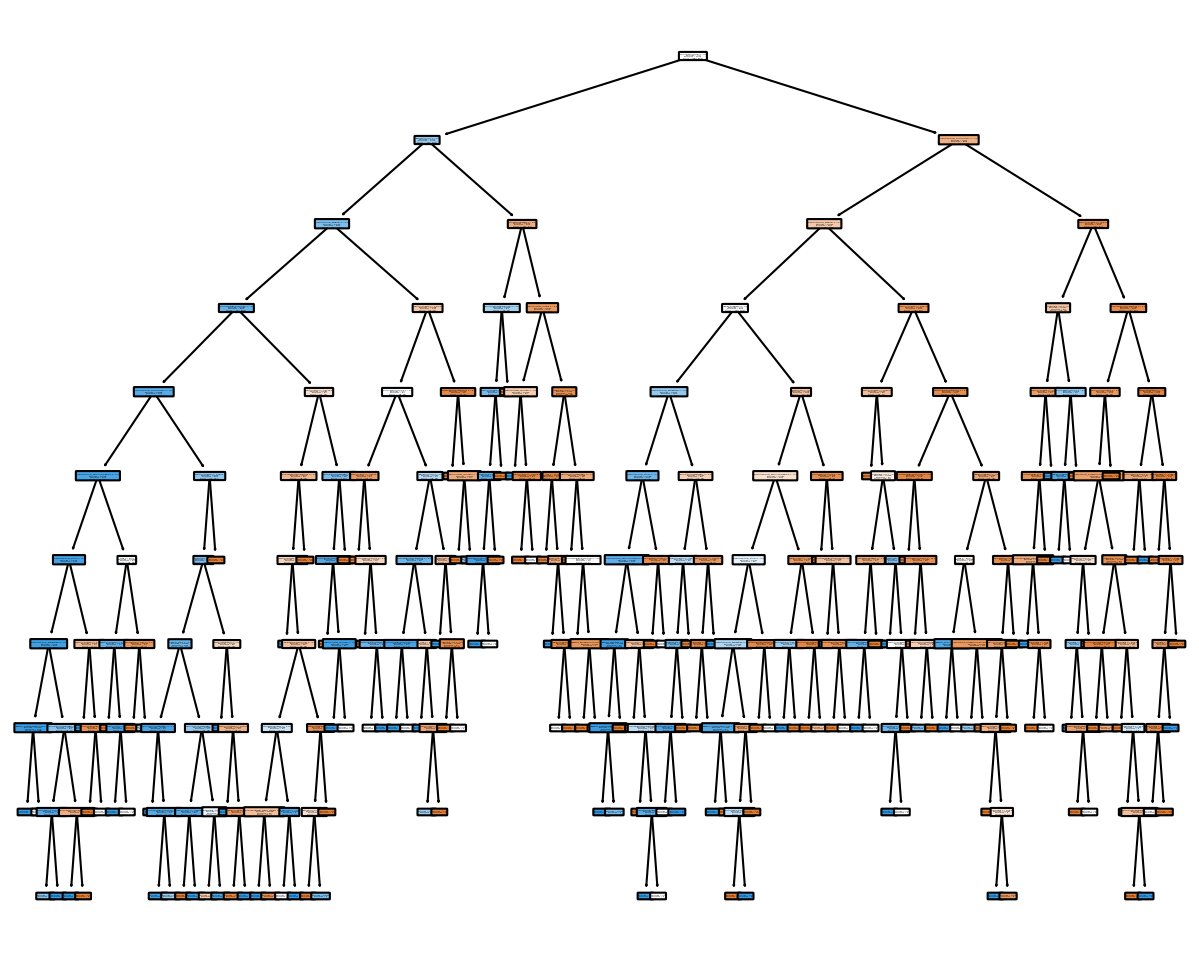

In [ ]:
# 'best_model' is the DecisionTreeClassifier with the best hyperparameters
plt.figure(figsize=(10, 8),dpi=150)
plot_tree(best_model_Tr,
          filled=True,
          rounded=True,
          class_names=['No', 'Yes'], # Replace with your actual class names
          feature_names=X_train.columns) # Assuming X_train is a pandas DataFrame
plt.show()

In [ ]:
plt.savefig("decision_tree.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming 'tree_model' is your trained DecisionTreeClassifier and 'X_test', 'y_test' are your test data
y_probs_tree = best_model_Tr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
auc_roc_tree = roc_auc_score(y_test, y_probs_tree)

print("AUC-ROC Score (Decision Tree):", auc_roc_tree)

AUC-ROC Score (Decision Tree): 0.8565573770491804


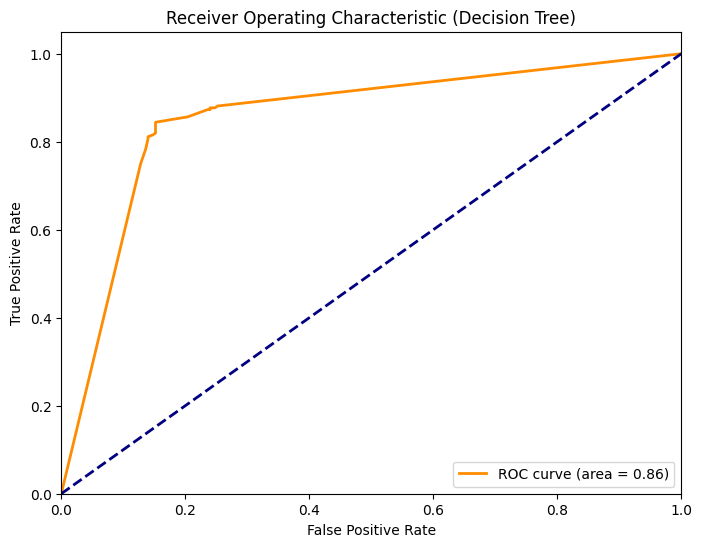

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'best_model' is your trained DecisionTreeClassifier and 'X_test', 'y_test' are your test data
y_probs_tree = best_model_Tr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_tree)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       250
           1       0.94      0.89      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       250
           1       0.94      0.90      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [ ]:
# Assuming 'best_rf_model' is your trained RandomForestClassifier
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df.head(10)) # Display top 10 important features

                              Feature  Importance
15                   StockOptionLevel    0.071458
9                       MonthlyIncome    0.059065
8                     JobSatisfaction    0.054334
6                      JobInvolvement    0.044751
22               YearsWithCurrManager    0.038808
25  Department_Research & Development    0.038136
10                        MonthlyRate    0.036170
4             EnvironmentSatisfaction    0.035642
1                           DailyRate    0.034689
2                    DistanceFromHome    0.033677


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming 'best_rf_model' is your trained RandomForestClassifier and 'X_test', 'y_test' are your test data
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
auc_roc_rf = roc_auc_score(y_test, y_probs_rf)

print("AUC-ROC Score (Random Forest):", auc_roc_rf)

AUC-ROC Score (Random Forest): 0.9726147540983606


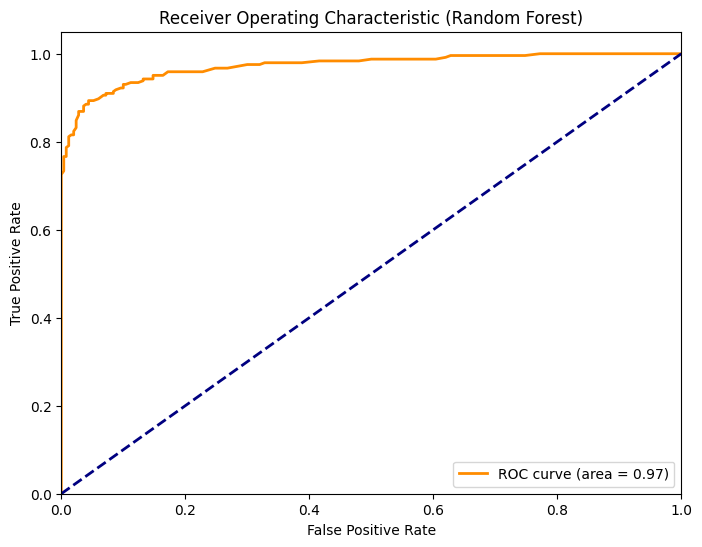

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'best_rf_model' is your trained RandomForestClassifier and 'X_test', 'y_test' are your test data
y_probs_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#compare the three model

In [ ]:
# Assuming you have already trained and evaluated the models:
# best_model_Lgr (Logistic Regression)
# best_model_Tr (Decision Tree)
# best_rf_model (Random Forest)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models_TR = [best_model_Lgr, best_model_Tr, best_rf_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

results = []
for model, name in zip(models_TR, model_names):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_probs)
    ])

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Model'] + metrics)

# Print the results table
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.898785   0.918103  0.872951  0.894958  0.952869
1        Decision Tree  0.846154   0.844262  0.844262  0.844262  0.856557
2        Random Forest  0.919028   0.935897  0.897541  0.916318  0.972615


COMPARING THE THREE MODEL:

**Random Forest:** Showed the best balance between precision and recall with a high F1-score (0.9163) and the highest AUC-ROC score (0.9726), indicating excellent discriminatory power.

